# Import Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

train_data = pd.read_csv("train_autopilot.csv")
X = train_data.values[:,:-1]
Y = train_data.values[:,-1]


# Define Functions

In [12]:
def fit(X, y, log_lambda):
    
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)    
    
    # Closed Form Equation
    I = np.identity(X.shape[1])
    _Lambda = math.e**log_lambda
    weights = np.dot(np.linalg.inv(np.dot(X.T, X)+(_Lambda*X.shape[0]*I)), np.dot(X.T, y))
    #                   ''' np.dot(_Lambda,I) => Regularization Coefficient '''
    
    return weights

def polynomial_transform(X, degrees):
    
    t = X.copy()
    
    for i in range(2,degrees+1):
        X = np.append(X, t**i, axis=1)
            
    return X

def predict(X,weights):
    
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    y_pred = np.dot(X, weights)
    
    return y_pred


# Compute Training error after adding regularization coefficient

Text(0.5, 1.0, 'RMSE against Regularization coefficient')

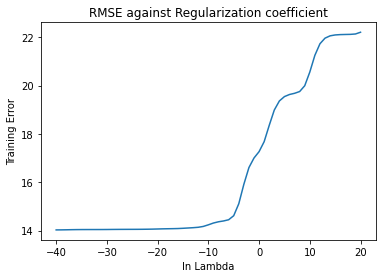

In [13]:
training_errors = []

X = polynomial_transform(X,6)

lambda_values = [i for i in range(-40,21)]
Weight_vector = dict()

for val in lambda_values:
    weights = fit(X, Y,val)
    y_pred = predict(X,weights)
    Weight_vector[str(val)] = weights

    root_mse = np.sqrt(np.mean((Y-y_pred)**2))
    training_errors.append(root_mse)

plt.plot(lambda_values,training_errors)
plt.xlabel("ln Lambda")
plt.ylabel("Training Error")
plt.title("RMSE against Regularization coefficient")

# Compute Test error after regularization

Text(0.5, 1.0, 'RMSE against Regularization coefficient')

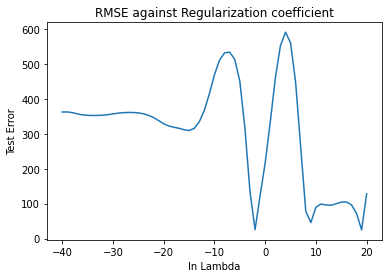

In [14]:
test_data = pd.read_csv("test_autopilot.csv")
X_test = test_data.values[:,:-1]
Y_test = test_data.values[:,-1]
X_test = polynomial_transform(X_test,6)

test_errors = []
lambda_values = [i for i in range(-40,21)]

for val in lambda_values:
    y_pred_test = predict(X_test,Weight_vector[str(val)])

    root_mse_test = np.sqrt(np.mean((Y_test-y_pred_test)**2))
    test_errors.append(root_mse_test)
    
plt.plot(lambda_values,test_errors)
plt.xlabel("ln Lambda")
plt.ylabel("Test Error")
plt.title("RMSE against Regularization coefficient")


# Visualizing Train & Test error after regularization

Text(0.5, 1.0, 'RMSE against Regularization coefficient')

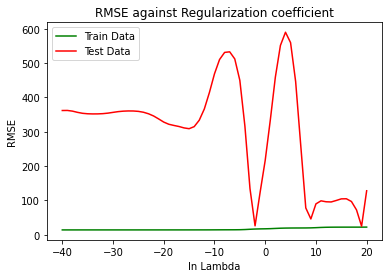

In [15]:
plt.plot(lambda_values,training_errors,color='green')
plt.plot(lambda_values,test_errors,color='red')
plt.legend(['Train Data','Test Data'])
plt.xlabel("ln Lambda")
plt.ylabel("RMSE")
plt.title("RMSE against Regularization coefficient")